In [1]:
import sys
import os
my_path = os.path.dirname(os.getcwd())
sys.path.append(my_path)

from prev_ob_models.Doxey2022.isolated_cells import *
from neuron import h
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [8]:
! python ../prev_ob_models/Doxey2022/compile_mechs.py

/home/kedoxey/OB_Model/OlfactoryBulb/prev_ob_models/Doxey2022/Mechanisms
Mod files: "./AmpaNmdaSyn.mod" "./CaPool.mod" "./CaT.mod" "./GabaSyn.mod" "./gapjunction.mod" "./Ih.mod" "./KA.mod" "./KCa.mod" "./Kd.mod" "./KM.mod" "./Kslow.mod" "./LCa.mod" "./Na.mod" "./VecStim.mod"

Creating x86_64 directory for .o files.

COBJS=''
 -> Compiling mod_func.c
 -> NMODL .././AmpaNmdaSyn.mod
gcc -O2   -I.   -I/home/kedoxey/.conda/envs/OBModel_linux/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
(cd "../."; MODLUNIT=/home/kedoxey/.conda/envs/OBModel_linux/lib/python3.7/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib /home/kedoxey/.conda/envs/OBModel_linux/lib/python3.7/site-packages/neuron/.data/bin/nocmodl AmpaNmdaSyn.mod -o "/home/kedoxey/OB_Model/OlfactoryBulb/prev_ob_models/Doxey2022/Mechanisms/x86_64")
 -> NMODL .././CaPool.mod
(cd "../."; MODLUNIT=/home/kedoxey/.conda/envs/OBModel_linux/lib/python3.7/site-packages/neuron/.

## Load cells

In [2]:
mc_cells = [MC1(), MC2(), MC3(), MC4(), MC5()]
tc_cells = [TC1(), TC2(), TC3(), TC4(), TC5()]
gc_cells = [GC1(), GC2(), GC3(), GC4(), GC5()]

Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.


## Initialize h

In [3]:
h.cvode_active(0)
delay = 200
dur = 700
h.tstop = 1000
h.celsius = 35
h.steps_per_ms = 10
h.dt = 1.0 / h.steps_per_ms

## Mitral Cells

In [4]:
mc_amps = [0.25, 0, -0.1]

num_mc_cells = len(mc_cells)

Text(0, 0.5, 'membrane potential (mV)')

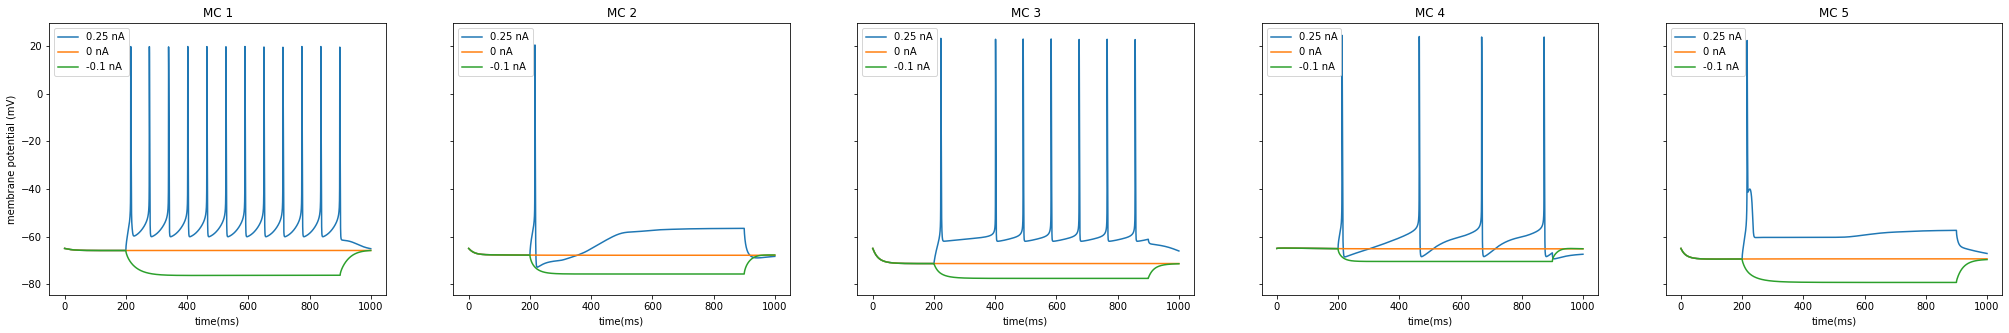

In [5]:
fig, axs = plt.subplots(1, num_mc_cells, figsize=(35,5), sharey=True)
axs = axs.ravel()

for idx, cell in enumerate(mc_cells):
    for amp in mc_amps:
        iclamp = h.IClamp(0.5, sec=cell.soma)
        iclamp.delay = delay
        iclamp.amp = amp
        iclamp.dur = dur

        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(cell.soma(0.5)._ref_v)

        h.run()

        axs[idx].plot(t, v, label=f'{amp} nA')
    
    axs[idx].set_title(f'{cell.cell_type} {cell.cell_id}')

    axs[idx].legend(loc='upper left')
    # axs[idx].set_ylim((-110,30))
    axs[idx].set_xlabel('time(ms)')

axs[0].set_ylabel('membrane potential (mV)')

## Tufted Cells

In [6]:
tc_amps = [0.25, 0, -0.1]

num_tc_cells = len(tc_cells)

Text(0, 0.5, 'membrane potential (mV)')

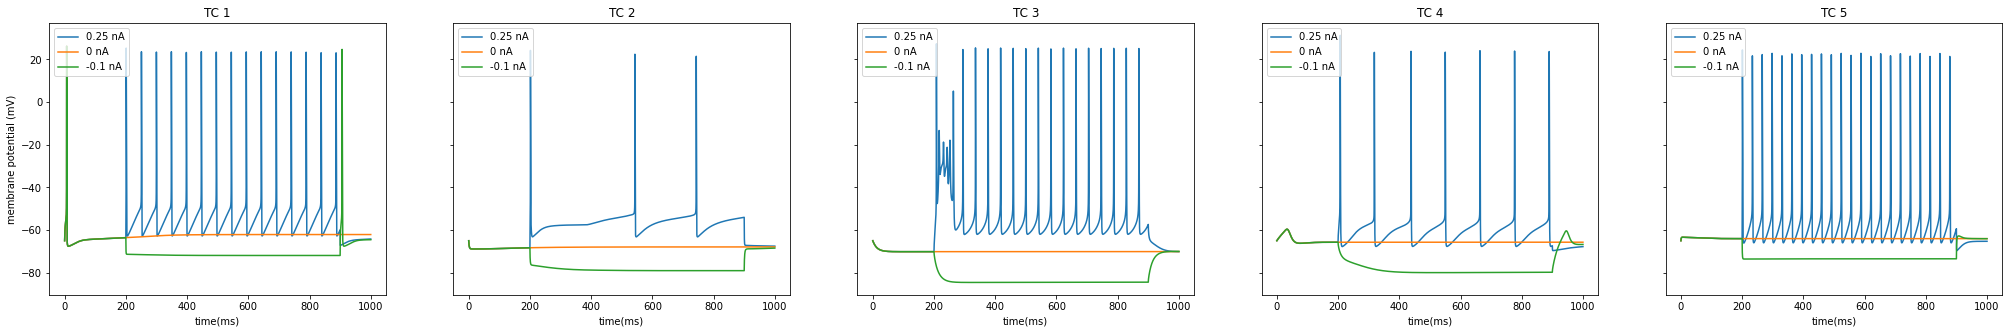

In [7]:
fig, axs = plt.subplots(1, num_tc_cells, figsize=(35,5), sharey=True)
axs = axs.ravel()

for idx, cell in enumerate(tc_cells):
    for amp in tc_amps:
        iclamp = h.IClamp(0.5, sec=cell.soma)
        iclamp.delay = delay
        iclamp.amp = amp
        iclamp.dur = dur

        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(cell.soma(0.5)._ref_v)

        h.run()

        axs[idx].plot(t, v, label=f'{amp} nA')
    
    axs[idx].set_title(f'{cell.cell_type} {cell.cell_id}')

    axs[idx].legend(loc='upper left')
    # axs[idx].set_ylim((-110,30))
    axs[idx].set_xlabel('time(ms)')

axs[0].set_ylabel('membrane potential (mV)')

## Granule Cells

In [8]:
gc_amps = [0.06, 0, -0.02]

num_gc_cells = len(gc_cells)

Text(0, 0.5, 'membrane potential (mV)')

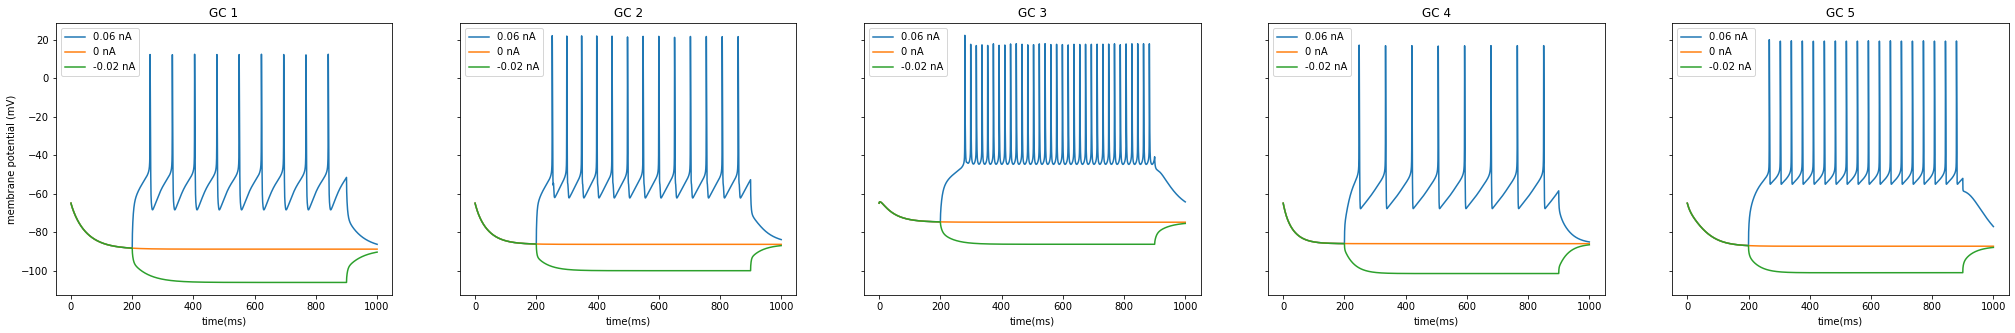

In [9]:
fig, axs = plt.subplots(1, num_gc_cells, figsize=(35,5), sharey=True)
axs = axs.ravel()

for idx, cell in enumerate(gc_cells):
    for amp in gc_amps:
        iclamp = h.IClamp(0.5, sec=cell.soma)
        iclamp.delay = delay
        iclamp.amp = amp
        iclamp.dur = dur

        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(cell.soma(0.5)._ref_v)

        h.run()

        axs[idx].plot(t, v, label=f'{amp} nA')
    
    axs[idx].set_title(f'{cell.cell_type} {cell.cell_id}')

    axs[idx].legend(loc='upper left')
    # axs[idx].set_ylim((-110,30))
    axs[idx].set_xlabel('time(ms)')

axs[0].set_ylabel('membrane potential (mV)')